<a href="https://colab.research.google.com/github/harshitbhavnani/Deep-Learning/blob/main/DeepLearning_J076_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imporing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import os
import tensorflow as tf
from keras.utils import to_categorical
from tqdm.keras import TqdmCallback
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

**Loading Data**

In [3]:
mnist = tf.keras.datasets.mnist
(train_data,train_label), (test_data,test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Image Preprocessing**

In [5]:
train_data,test_data = train_data/255.0, test_data/255.0

**Displaying Images**

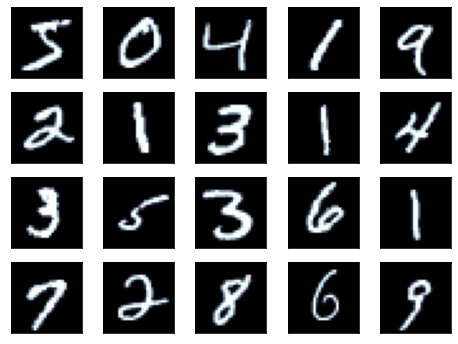

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_data[i].reshape((28, 28)),cmap=plt.cm.bone)

In [7]:
train_data = train_data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)

In [8]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

**Building CNN Model**

In [9]:
cnn = Sequential()
cnn.add(Conv2D(filters = 28, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
cnn.add(Conv2D(filters = 28, kernel_size = (5,5),padding = 'Same', activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))


cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


cnn.add(Flatten())
cnn.add(Dense(units = 128,activation = 'relu'))
cnn.add(Dense(units = 128, activation = "relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation = "softmax"))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        728       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 28)        19628     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        16192     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [11]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="mnist.hdf5",save_weights_only=True,monitor='accuracy',mode='max',save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=0.003,patience=15,mode='max',restore_best_weights=True)

In [13]:
history=cnn.fit(x=train_data,y=train_label,verbose=0,epochs=2,callbacks=[model_checkpoint_callback, TqdmCallback(verbose=1),es])

In [14]:
cnn.evaluate(test_data,test_label)

313/313 [==============================] - 16s 49ms/step - loss: 0.0323 - accuracy: 0.9895


[0.0323166698217392, 0.9894999861717224]

**Saving the model**

In [15]:
cnn.save('mnist.h5', save_format='h5')

In [16]:
from keras.models import load_model
newmodel = load_model('mnist.h5')

In [17]:
newmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        728       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 28)        19628     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        16192     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [18]:
newmodel.evaluate(test_data,test_label)

313/313 [==============================] - 15s 49ms/step - loss: 0.0323 - accuracy: 0.9895


[0.0323166698217392, 0.9894999861717224]

In [19]:
ypred = cnn.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Flask Depoyment**

In [20]:
!pip install flask gevent requests pillow

     |████████████████████████████████| 5.6MB 3.6MB/s 
     |████████████████████████████████| 245kB 41.5MB/s 
     |████████████████████████████████| 163kB 38.6MB/s 


In [21]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

In [22]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

In [23]:
a = '''
<!doctype html>
<html lang="en">
<head>
</head> 
  <body>
 
          <h3>Image Recognition Server</h3>
       
      <form action="" method=post enctype=multipart/form-data>
        <input type=file name=file>
        <input type=submit value=Upload>
    </form>
    {{label}}  
     
  </body>
  </html>
  '''

In [24]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

In [25]:
from flask import Flask, render_template, request
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'


def load_mymodel():
    global mymodel
    mymodel = load_model('mnist.h5')

@app.route('/')
def home():
    return render_template('index.html')

def predictions(file):
    img = image.load_img(file, target_size=(28,28), color_mode="grayscale")
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    ans = mymodel.predict_classes(img)
    return ans


@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['file']
    filepath = os.path.join(app.config['UPLOADS'], file.filename)
    file.save(filepath)
    output = predictions(filepath)
    return render_template('index.html', label=output)



if __name__=='__main__':
    load_mymodel()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bdc4ee4a4d1c.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [14/Mar/2021 16:30:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2021 16:30:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Mar/2021 16:31:08] "GET / HTTP/1.1" 200 -
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
127.0.0.1 - - [14/Mar/2021 16:31:16] "POST / HTTP/1.1" 200 -
